In [7]:
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Parameters
S0 = 10
K = 12      # strike price
r = 0.04    # interest rate
sigma = 0.4 # volatility
T = 2
N = 100

# Discretization
dx = 2.0   # Space discretization
dt = 2e-4  # Time discretization

x = np.arange(0, N + dx, dx)
t = np.arange(0, T + dt, dt)

# Initialize the solution grid
u = np.zeros((len(x), len(t)))

# Set u(x, t) at final time t = T
u[:, len(t)-1] = np.maximum(0, x - K)

# Boundary conditions
u[0, :] = 0
u[len(x)-1, :] = N - K

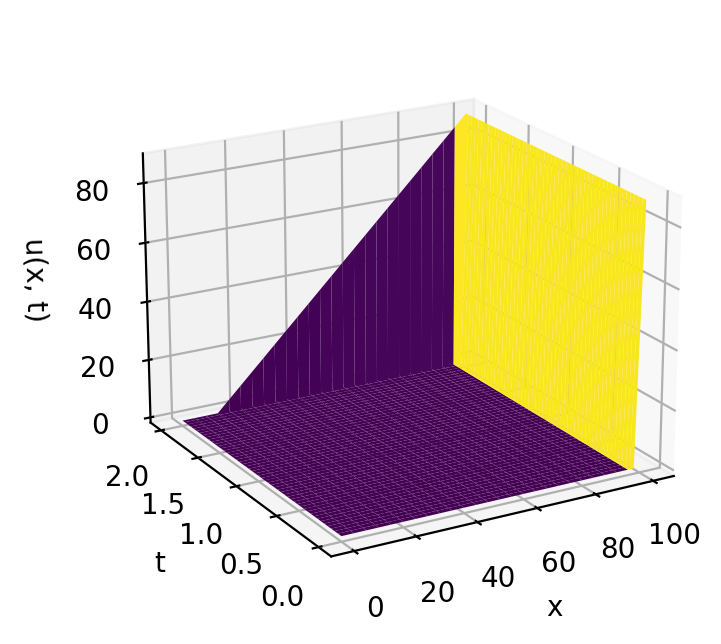

In [8]:
# Create a 3D figure
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Generate the x, y, and z values for the plot
X, Y = np.meshgrid(x, t)
Z = u.T

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

# Change perspective
ax.view_init(20, 240)

# Show the plot
plt.show()

We can use the explicit theta-method to step through time and solve for u at each time step. Since theta = 0, this is equivalent to the explicit Euler method. We can use a loop to iterate through time:

# $\frac{u^{j+1}_{i}-u^{j}_{i}}{\Delta t} = \frac{\sigma^2 \cdot x^2}{2} \cdot \frac{u^{j}_{i+1} - 2u^{j}_{i} + u^{j}_{i-1}}{(\Delta x)^2} + r x \cdot \frac{u^{j}_{i+1}-u^{j}_{i}}{\Delta x} - r\cdot u^{j}_{i}$

In [9]:
# Time-stepping loop
for j in range(0, len(t)-1): # time
    for i in range(1, len(x)-1): # space
        u[i, j+1] = u[i, j] + dt*(sigma**2 * x[i]**2 / 2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j])/dx**2 + r*x[i]*(u[i+1, j] - u[i, j])/dx - r*u[i, j])

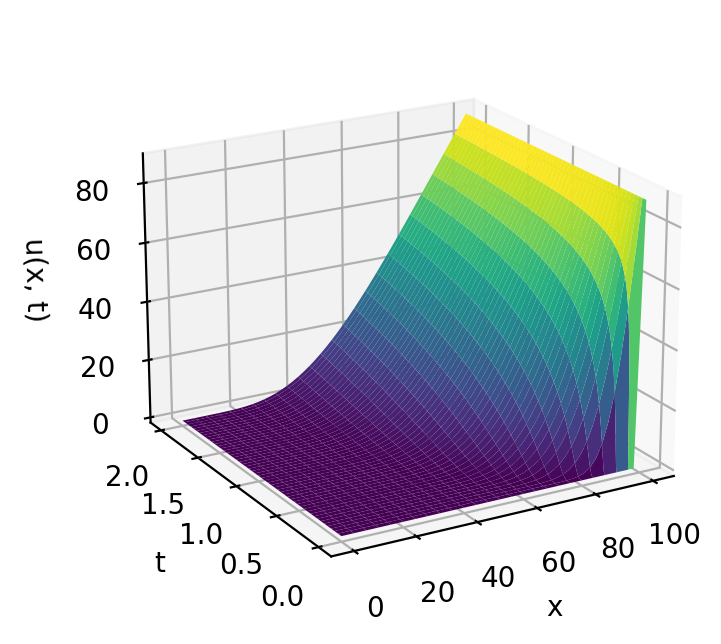

In [10]:
# Create a 3D figure
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Generate the x, y, and z values for the plot
X, Y = np.meshgrid(x, t)
Z = u.T

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

# Change perspective
ax.view_init(20, 240)

# Show the plot
plt.show()

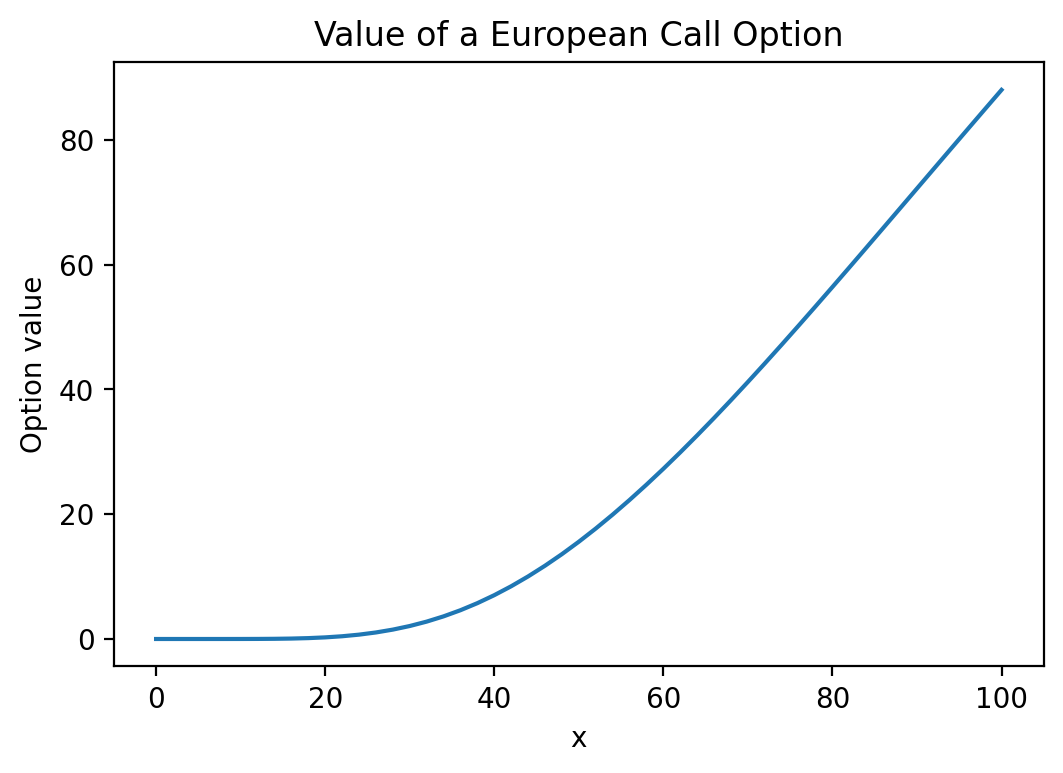

In [11]:
# Compute the value of a European call option
S0 = 10
option_value = np.maximum(u[:, -1], 0)

# Plot the option value
plt.figure(dpi=200)
plt.plot(x, option_value)
plt.title("Value of a European Call Option")
plt.xlabel('x')
plt.ylabel('Option value')
plt.show()

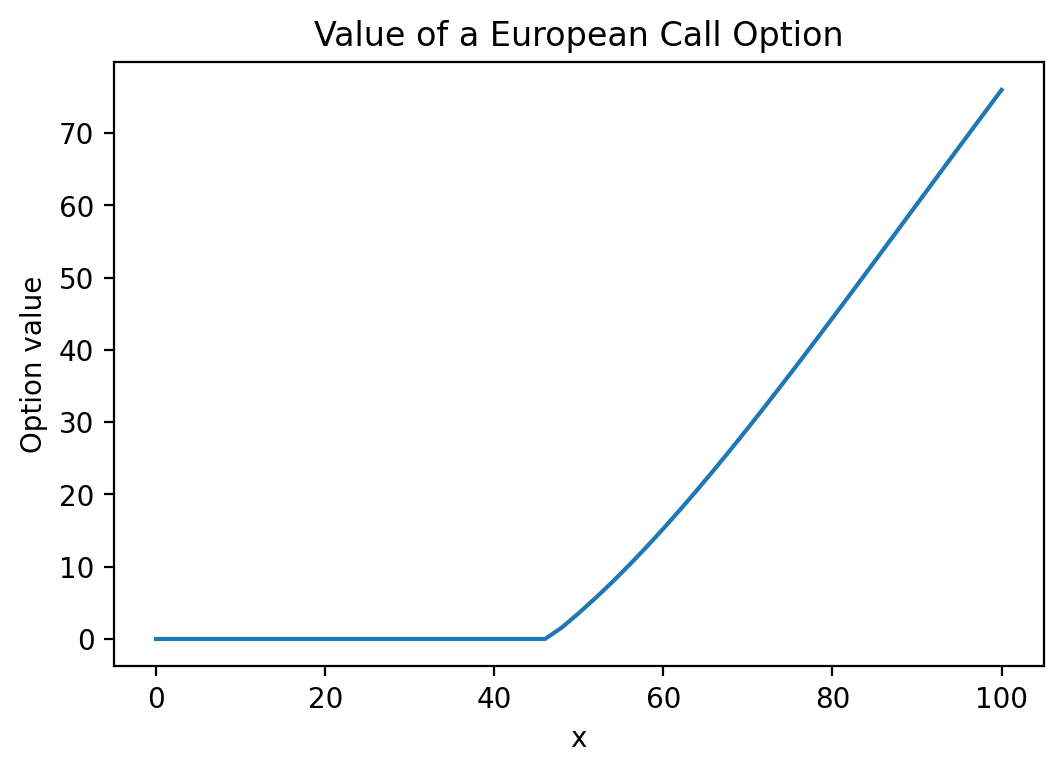

In [12]:
# Compute the value of a European call option
S0 = 10
option_value = np.maximum(u[:, -1] - K, 0)

# Plot the option value
plt.figure(dpi=200)
plt.plot(x, option_value)
plt.title("Value of a European Call Option")
plt.xlabel('x')
plt.ylabel('Option value')
plt.show()